# MODULO 2: MANEJO DE DATOS
### Autor: Guillermo Alfonso Muñiz Hermosillo
### Matricula: A01793101
### Curso: Ciencia y Analitica de Datos
<h1><center>PROGRESO DEL CURSO:</center></h1>
<img src='./imagenes/A01793101_ProgresoMod2.png'>

<h1><center>GRADED REVIEW QUESTIONS:</center></h1>
<img src='./imagenes/A01793101_GradedReviewQuestionsMod2.png'>

# Pre-Procesamiento de datos
El proceso de convertir o mapear datos de un estado inicial a otro formato para prepararlos para un analisis futuro.

- Identificar y manejar valores faltantes.
- Formateo de datos
- Normalizacion de datos (Centrado/Scalado)
- Data Binning
- Convertir variables categoricas a variables numericas

## TRATAMIENTO DE VALORES FALTANTES
Cuando una caracteristica o variable de una observacion no cuenta con un dato almacenado. 

- Verificar con la fuente de informacion.
- Eliminar el valor faltante:
    - Solo eliminar la variable.
    - Eliminar toda la entrada de datos.
- Remplazar valores faltantes:
    - Promedio de observaciones similares.
    - Moda
    - Otras funciones.
    

In [1]:
import pandas as pd
import numpy as np
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
# Debido a que nuestro conjunto de datos no contiene un encabezado, necesitamos especificarlo en el metodo read_csv()
df = pd.read_csv(url, header=None)
headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horse-power", "peak-rpm", "city-mpg", "highway-mpg", "price"]

# Usamos df.columns para modificar los nombres de la table
df.columns = headers
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horse-power,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## ELIMINAR VALORES FALTANTES
Para eliminar cualquier valor faltantes, usamos dropna()
- axis = 0 Elimina una fila entera
- axis = 1 Elimina la columna entera

In [2]:
df.dropna(subset=['price'], axis=0, inplace=True) # Elimina cualquier valor valtante en la columna price
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horse-power,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## REMPLAZAR VALORES FALTANTES
Para remplazar valores faltantes, usamos el metodo replace()

In [14]:
# Remplazamos los valores ? a NaN
df['normalized-losses'].replace('?', np.nan, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horse-power,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [15]:
# Get The DataTypes of the columns.
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horse-power           object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [16]:
# Convertimos a Flotante la columna Normalized-losses
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'])
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horse-power           object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [17]:
# Obtenemos la media de todas las filas de la columna
media = df['normalized-losses'].mean()
media

122.0

In [18]:
# Remplazamos con la media los valors convertidos a NaN
df['normalized-losses'].replace(np.nan, media, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horse-power,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Formateo de Datos En Python
Convertir datos a un estandar comun para permitir a los usuarios realizar comparaciones significativas.

In [20]:
# Creamos una nueva columna con nuestro calculo de Litros por 100km usando la columna existente de Millas por galon
df['city-L/100km'] = 235/df['city-mpg']
df[['city-mpg', 'city-L/100km']]

,city-mpg,city-L/100km
0,21,11.190476
1,21,11.190476
2,19,12.368421
3,24,9.791667
4,18,13.055556
...,...,...
200,23,10.217391
201,19,12.368421
202,18,13.055556
203,26,9.038462


In [21]:
# Tambien necesitamos convertir los datos de tipo erroneos.
df['price'].tail()

200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, dtype: object

In [26]:
# COmo se puede observar el tipo de dato es "Object" Necesitamos un valor flotante o entero como valor
df['price'].replace('?', np.nan, inplace=True)
df['price'] = df['price'].astype('float')
df['price'].tail()

200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, dtype: float64

## NORMALIZACION DE DATOS
Usamos la normalizacion para que el rango de los valores en una o multiples columnas sea consistente.

- Escalamiento de Caracteristica Simple: Xnew = Xold/Xmax
- Escalamiento Min-Max: Xnew = (Xold - Xmin) / (Xmax-Xmin)
- Z-Score: Xnew = (Xold - u) / r

### Escalamiento de Caracteristica Simple

In [28]:
# Dividimos cada valor entre el valor maximo de la columna
df["length"] = df["length"] / df["length"].max()
df["length"]

0      0.811148
1      0.811148
2      0.822681
3      0.848630
4      0.848630
         ...   
200    0.907256
201    0.907256
202    0.907256
203    0.907256
204    0.907256
Name: length, Length: 205, dtype: float64

### Escalamiento Min-Max

In [30]:
# Restamos a cada valor el minimo de esa columna y lo dividimos por el rango de dicha columna (max - min)
df["length"] = (df["length"]-df["length"].min()) / (df["length"].max()-df["length"].min())
df["length"]

0      0.413433
1      0.413433
2      0.449254
3      0.529851
4      0.529851
         ...   
200    0.711940
201    0.711940
202    0.711940
203    0.711940
204    0.711940
Name: length, Length: 205, dtype: float64

### Escalamiento Z-Score

In [31]:
# Restamos a cada valor el promedio de la columna a escalar y la dividimos entre la desviacion estandar de dicha columna
df["length"] = (df["length"] - df["length"].mean()) / df["length"].std()
df["length"]

0     -0.425480
1     -0.425480
2     -0.230948
3      0.206750
4      0.206750
         ...   
200    1.195622
201    1.195622
202    1.195622
203    1.195622
204    1.195622
Name: length, Length: 205, dtype: float64

## BINNING EN PYTHON (AGRUPAMIENTO)
Se refiere a agrupar valores en "Bins" para mejorar la exactitud del modelo

In [35]:
# Primero remplazo los valores faltantes por la mediana del precio.
mediana = df['price'].median()
df['price'].replace(np.nan, mediana, inplace=True)
df['price']

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [37]:
# Creamos 3 Bins, indicando precios bajos, medios y altos. 
# Para hacer esto utilizamos la funcion linspace que crea grupos de datos separados equitativmente
bins = np.linspace(min(df['price']), max(df['price']), 4)
bins

array([ 5118.        , 18545.33333333, 31972.66666667, 45400.        ])

In [38]:
# Creamos una lista de nombres para estos bins
grupos = ['Bajo', 'Medio', 'Alto']
grupos

['Bajo', 'Medio', 'Alto']

In [40]:
# Creamos una nueva columan en nuestro dataframe. 
# Usando la funcion cut para segmentar y ordenar los datos en bins
df['price-binned'] = pd.cut(df['price'], bins, labels=grupos, include_lowest=True)
df[['price', 'price-binned']].tail()

,price,price-binned
200,16845.0,Bajo
201,19045.0,Medio
202,21485.0,Medio
203,22470.0,Medio
204,22625.0,Medio


<AxesSubplot: >

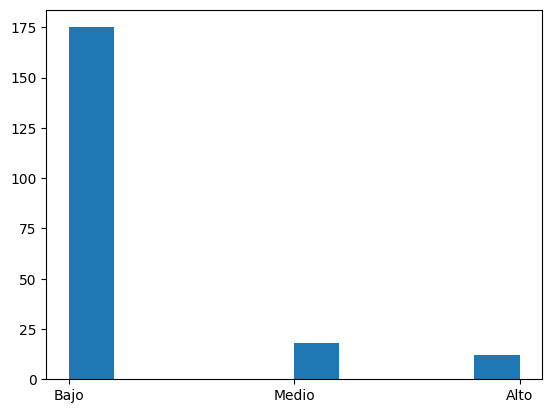

In [48]:
import matplotlib.pyplot as plt

df['price-binned'].hist(grid=False)

## CONVERTIR VARIABLES CATEGORICAS A NUMERICAS
La mayoria de los modelos estadisticos no pueden tomar objetos/strings como entrada, es por esto que necesitamos convertirlos a numericas para poder trabajar con ellos.

Para convertir una variable categorica a numerica, podemos usar metodos de codificacion llamado "one-hot encoding" Que lo que hace es convertir nuestra variable categorica en un rango de numeros que indican el valor de esta variable.

In [50]:
# Podemos usar el metodo pandas.get_dummies() para convertirlas
pd.get_dummies(df['fuel-type'])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0
